In [9]:
# HIDDEN
from datascience import *
import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

In [2]:
# Our first function definition

def double(x):
    """ Double x """
    return 2*x

In [3]:
double(17)

34

In [4]:
double(-0.6/4)

-0.3

In [5]:
any_name = 42
double(any_name)

84

In [6]:
double(make_array(3, 4, 5))

array([ 6,  8, 10])

In [7]:
x

NameError: name 'x' is not defined

In [8]:
# A function with more than one argument

def percent(x, total):
    """Convert x to a percentage of total.
    
    More precisely, this function divides x by total,
    multiplies the result by 100, and rounds the result
    to two decimal places.
    
    >>> percent(4, 16)
    25.0
    >>> percent(1, 6)
    16.67
    """
    return round((x/total)*100, 2)

In [9]:
percent(33, 200)

16.5

In [10]:
def percents(counts):
    """Convert the values in array_x to percents out of the total of array_x."""
    total = counts.sum()
    return np.round((counts/total)*100, 2) #  replacing round by np.round because the argument is an array and not a number.

In [11]:
some_array = make_array(7, 10, 4)
percents(some_array)

array([33.33, 47.62, 19.05])

In [12]:
def biggest_difference(array_x):
    """Find the biggest difference in absolute value between two adjacent elements of array_x."""
    diffs = np.diff(array_x)
    absolute_diffs = abs(diffs)
    return max(absolute_diffs)

some_numbers = make_array(2, 4, 5, 6, 4, -1, 1)
big_diff = biggest_difference(some_numbers)
print("The biggest difference is", big_diff)

The biggest difference is 5


In [13]:
def percents(counts, decimal_places):
    """Convert the values in array_x to percents out of the total of array_x."""
    total = counts.sum()
    return np.round((counts/total)*100, decimal_places)

parts = make_array(2, 1, 4)
print("Rounded to 1 decimal place: ", percents(parts, 1))
print("Rounded to 2 decimal places:", percents(parts, 2))
print("Rounded to 3 decimal places:", percents(parts, 3))

Rounded to 1 decimal place:  [28.6 14.3 57.1]
Rounded to 2 decimal places: [28.57 14.29 57.14]
Rounded to 3 decimal places: [28.571 14.286 57.143]


In [14]:
def percents(counts, decimal_places=2):
    """Convert the values in array_x to percents out of the total of array_x."""
    total = counts.sum()
    return np.round((counts/total)*100, decimal_places)

parts = make_array(2, 1, 4)
print("Rounded to 1 decimal place:", percents(parts, 1))
print("Rounded to the default number of decimal places:", percents(parts))

Rounded to 1 decimal place: [28.6 14.3 57.1]
Rounded to the default number of decimal places: [28.57 14.29 57.14]


In [4]:
def cut_off_at_100(x):
    """The smaller of x and 100"""
    return min(x, 100)

In [16]:
cut_off_at_100(17)

17

In [17]:
cut_off_at_100(117)

100

In [18]:
cut_off_at_100(100)

100

In [19]:
ages = Table().with_columns(
    'Person', make_array('A', 'B', 'C', 'D', 'E', 'F'),
    'Age', make_array(17, 117, 52, 100, 6, 101)
)
ages

Person,Age
A,17
B,117
C,52
D,100
E,6
F,101


In [20]:
# The apply method calls a function on each element of a column, forming a new array of return values.
ages.apply(cut_off_at_100, 'Age') 

array([ 17, 100,  52, 100,   6, 100])

In [21]:
ages.with_column(
    'Cut Off Age', ages.apply(cut_off_at_100, 'Age')
)

Person,Age,Cut Off Age
A,17,17
B,117,100
C,52,52
D,100,100
E,6,6
F,101,100


In [22]:
cut_off_at_100

<function __main__.cut_off_at_100(x)>

In [5]:
cut_off = cut_off_at_100

In [6]:
cut_off

<function __main__.cut_off_at_100(x)>

In [7]:
# Galton's data on heights of parents and their adult children
galton = Table.read_table('galton.csv')
galton

family,father,mother,midparentHeight,children,childNum,gender,childHeight
1,78.5,67,75.43,4,1,male,73.2
1,78.5,67,75.43,4,2,female,69.2
1,78.5,67,75.43,4,3,female,69
1,78.5,67,75.43,4,4,female,69
2,75.5,66.5,73.66,4,1,male,73.5
2,75.5,66.5,73.66,4,2,male,72.5
2,75.5,66.5,73.66,4,3,female,65.5
2,75.5,66.5,73.66,4,4,female,65.5
3,75,64,72.06,2,1,male,71
3,75,64,72.06,2,2,female,68


In [8]:
heights = galton.select(3, 7).relabeled(0, 'MidParent').relabeled(1, 'Child') # .select(3, 7)
heights

MidParent,Child
75.43,73.2
75.43,69.2
75.43,69
75.43,69
73.66,73.5
73.66,72.5
73.66,65.5
73.66,65.5
72.06,71
72.06,68


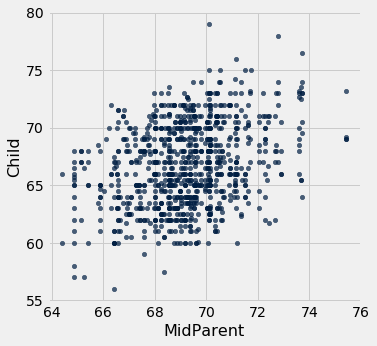

In [9]:
# What would be a good way for him to go about predicting the child's height, given that the midparent height was, say, 68 inches?
heights.scatter(0)

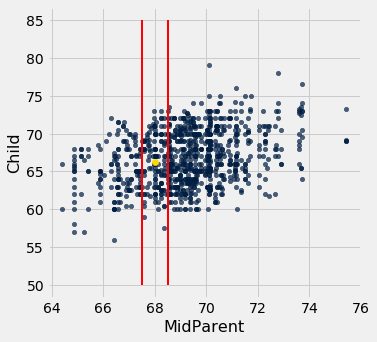

In [10]:
# For now we will just make a reasonable definition of what "around 68 inches" means, and work with that. Later in the course we will examine the consequences of such choices.
# all the points corresponding to a midparent height between 67.5 inches and 68.5 inches. 
# Each of these points corresponds to one child; our prediction of the height of the new couple's child is the average height of all the children in the strip. 
# That's represented by the gold dot.
heights.scatter('MidParent')
_ = plots.plot([67.5, 67.5], [50, 85], color='red', lw=2)
_ = plots.plot([68.5, 68.5], [50, 85], color='red', lw=2)
_ = plots.scatter(68, 66.24, color='gold', s=40)

In [11]:
#In order to calculate exactly where the gold dot should be, we first need to indentify all the points in the strip
close_to_68 = heights.where('MidParent', are.between(67.5, 68.5))
close_to_68

MidParent,Child
68.44,62
67.94,71.2
67.94,67
68.33,62.5
68.23,73
68.23,72
68.23,69
67.98,73
67.98,71
67.98,71


In [12]:
# The predicted height of a child who has a midparent height of 68 inches is the average height of the children in these rows. 
close_to_68.column('Child').mean()

66.24045801526718

In [13]:
def predict_child(mpht):
    """Predict the height of a child whose parents have a midparent height of mpht.
    
    The prediction is the average height of the children whose midparent height is
    in the range mpht plus or minus 0.5.
    """
    
    close_points = heights.where('MidParent', are.between(mpht-0.5, mpht + 0.5))
    return close_points.column('Child').mean()                       

In [14]:
predict_child(68)

66.24045801526718

In [15]:
predict_child(74)

70.41578947368421

In [16]:
# Apply predict_child to all the midparent heights
# How good are these predictions? We can get a sense of this by comparing the predictions with the data that we already have
heights_with_predictions = heights.with_column(
    'Prediction', heights.apply(predict_child, 'MidParent')
)

In [17]:
heights_with_predictions

MidParent,Child,Prediction
75.43,73.2,70.1
75.43,69.2,70.1
75.43,69,70.1
75.43,69,70.1
73.66,73.5,70.4158
73.66,72.5,70.4158
73.66,65.5,70.4158
73.66,65.5,70.4158
72.06,71,68.5025
72.06,68,68.5025


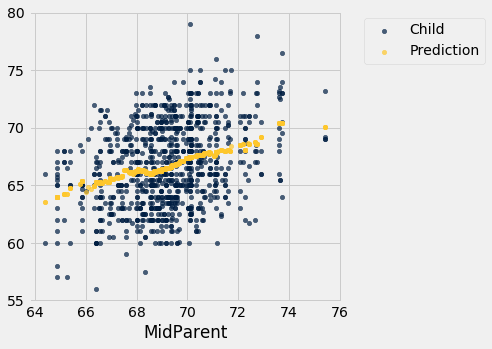

In [18]:
# To see where the predictions lie relative to the observed data, we can draw overlaid scatter plots with MidParent as the common horizontal axis.
heights_with_predictions.scatter('MidParent')
# The graph of gold dots is called a graph of averages, because each gold dot is the center of a vertical strip like the one we drew earlier
#  Galton's methods such as the one we have used here are precursors to nearest neighbor prediction methods that now have powerful applications in diverse settings. 

In [19]:
cones = Table().with_columns(
    'Flavor', make_array('strawberry', 'chocolate', 'chocolate', 'strawberry', 'chocolate'),
    'Price', make_array(3.55, 4.75, 6.55, 5.25, 5.25)
)
cones

Flavor,Price
strawberry,3.55
chocolate,4.75
chocolate,6.55
strawberry,5.25
chocolate,5.25


In [20]:
cones.group('Flavor') # The Price column has not been used.

Flavor,count
chocolate,3
strawberry,2


In [21]:
cones.group('Flavor', sum) # sum will sum up the prices in all rows that match each category.

Flavor,Price sum
chocolate,16.55
strawberry,8.8


In [22]:
cones.where('Flavor', are.equal_to('chocolate')).column('Price')

array([4.75, 6.55, 5.25])

In [23]:
sum(cones.where('Flavor', are.equal_to('chocolate')).column('Price'))

16.55

In [29]:
# For each distinct value in `Flavor, access all the rows
# and create an array of `Price`

cones_choc = cones.where('Flavor', are.equal_to('chocolate')).column('Price')
cones_strawb = cones.where('Flavor', are.equal_to('strawberry')).column('Price')

# Display the arrays in a table

grouped_cones = Table().with_columns(
    'Flavor', make_array('chocolate', 'strawberry'),
    'Array of All the Prices', make_array(cones_choc, cones_strawb)
)

# grouped_cones 
# Append a column with the sum of the `Price` values in each array
price_totals = grouped_cones.with_column(
    'Sum of the Array', make_array(sum(cones_choc), sum(cones_strawb))
)
price_totals

Flavor,Array of All the Prices,Sum of the Array
chocolate,[4.75 6.55 5.25],16.55
strawberry,[3.55 5.25],8.8


In [30]:
cones.group('Flavor', max)

Flavor,Price max
chocolate,6.55
strawberry,5.25


In [31]:
price_maxes = grouped_cones.with_column(
    'Max of the Array', make_array(max(cones_choc), max(cones_strawb))
)
price_maxes

Flavor,Array of All the Prices,Max of the Array
chocolate,[4.75 6.55 5.25],6.55
strawberry,[3.55 5.25],5.25


In [32]:
lengths = grouped_cones.with_column(
    'Length of the Array', make_array(len(cones_choc), len(cones_strawb))
)
lengths

Flavor,Array of All the Prices,Length of the Array
chocolate,[4.75 6.55 5.25],3
strawberry,[3.55 5.25],2


In [4]:
nba1 = Table.read_table('nba_salaries.csv')
nba = nba1.relabeled("2015-2016 SALARY", 'SALARY')
nba

PLAYER,POSITION,TEAM,SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333
Kent Bazemore,SF,Atlanta Hawks,2
Dennis Schroder,PG,Atlanta Hawks,1.7634
Tim Hardaway Jr.,SG,Atlanta Hawks,1.30452


In [9]:
# How much money did each team pay for its players' salaries?
teams_and_money = nba.select('TEAM', 'SALARY')
teams_and_money.group("TEAM", sum)

TEAM,SALARY sum
Atlanta Hawks,69.5731
Boston Celtics,50.2855
Brooklyn Nets,57.307
Charlotte Hornets,84.1024
Chicago Bulls,78.8209
Cleveland Cavaliers,102.312
Dallas Mavericks,65.7626
Denver Nuggets,62.4294
Detroit Pistons,42.2118
Golden State Warriors,94.0851


In [11]:
# How many NBA players were there in each of the five positions?
#positions_and_players = nba.select("POSITION", "PLAYER")
#positions_and_players.group("POSITION")
nba.group("POSITION")

POSITION,count
C,69
PF,85
PG,85
SF,82
SG,96


In [14]:
# What was the average salary of the players at each of the five positions?
position_and_money = nba.select("POSITION", "SALARY")
position_and_money.group("POSITION", np.mean)

POSITION,SALARY mean
C,6.08291
PF,4.95134
PG,5.16549
SF,5.53267
SG,3.9882


In [15]:
# If we had not selected the two columns as our first step, group would not attempt to "average" the categorical columns in nba
nba.group('POSITION', np.mean)

POSITION,PLAYER mean,TEAM mean,SALARY mean
C,,,6.08291
PF,,,4.95134
PG,,,5.16549
SF,,,5.53267
SG,,,3.9882


In [2]:
more_cones = Table().with_columns(
    'Flavor', make_array('strawberry', 'chocolate', 'chocolate', 'strawberry', 'chocolate', 'bubblegum'),
    'Color', make_array('pink', 'light brown', 'dark brown', 'pink', 'dark brown', 'pink'),
    'Price', make_array(3.55, 4.75, 5.25, 5.25, 5.25, 4.75)
)

more_cones

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


In [3]:
more_cones.group('Flavor')

Flavor,count
bubblegum,1
chocolate,3
strawberry,2


In [4]:
more_cones.group(['Flavor', 'Color'])

Flavor,Color,count
bubblegum,pink,1
chocolate,dark brown,2
chocolate,light brown,1
strawberry,pink,2


In [5]:
more_cones.group(['Flavor', 'Color'], sum)

Flavor,Color,Price sum
bubblegum,pink,4.75
chocolate,dark brown,10.5
chocolate,light brown,4.75
strawberry,pink,8.8


In [6]:
more_cones.pivot('Flavor', 'Color')
# The group method takes a list of two labels because it is flexible: it could take one or three or more. 
# pivot always takes two column labels, one to determine the columns and one to determine the rows.

Color,bubblegum,chocolate,strawberry
dark brown,0,2,0
light brown,0,1,0
pink,1,0,2


In [7]:
# An optional third argument called values indicates a column of values that will replace the counts in each cell of the grid. 
# collect indicates how to collect them all into one aggregated value to be displayed in the cell.
more_cones.pivot('Flavor', 'Color', values='Price', collect=sum)
# The advantage of pivot is that it places grouped values into adjacent columns, so that they can be combined and compared.

Color,bubblegum,chocolate,strawberry
dark brown,0,10.5,0
light brown,0,4.75,0
pink,4.75,0,8.8


In [9]:
full_table = Table.read_table('educ_inc.csv')
ca_2014 = full_table.where('Year', are.equal_to('1/1/14 0:00')).where('Age', are.not_equal_to('00 to 17'))
ca_2014

Year,Age,Gender,Educational Attainment,Personal Income,Population Count
1/1/14 0:00,18 to 64,Female,No high school diploma,"H: 75,000 and over",2058
1/1/14 0:00,65 to 80+,Male,No high school diploma,"H: 75,000 and over",2153
1/1/14 0:00,65 to 80+,Female,No high school diploma,"G: 50,000 to 74,999",4666
1/1/14 0:00,65 to 80+,Female,High school or equivalent,"H: 75,000 and over",7122
1/1/14 0:00,65 to 80+,Female,No high school diploma,"F: 35,000 to 49,999",7261
1/1/14 0:00,65 to 80+,Male,No high school diploma,"G: 50,000 to 74,999",8569
1/1/14 0:00,18 to 64,Female,No high school diploma,"G: 50,000 to 74,999",14635
1/1/14 0:00,65 to 80+,Male,No high school diploma,"F: 35,000 to 49,999",15212
1/1/14 0:00,65 to 80+,Male,"College, less than 4-yr degree","B: 5,000 to 9,999",15423
1/1/14 0:00,65 to 80+,Female,Bachelor's degree or higher,"A: 0 to 4,999",15459


In [10]:
educ_inc = ca_2014.select('Educational Attainment', 'Personal Income', 'Population Count')
educ_inc

Educational Attainment,Personal Income,Population Count
No high school diploma,"H: 75,000 and over",2058
No high school diploma,"H: 75,000 and over",2153
No high school diploma,"G: 50,000 to 74,999",4666
High school or equivalent,"H: 75,000 and over",7122
No high school diploma,"F: 35,000 to 49,999",7261
No high school diploma,"G: 50,000 to 74,999",8569
No high school diploma,"G: 50,000 to 74,999",14635
No high school diploma,"F: 35,000 to 49,999",15212
"College, less than 4-yr degree","B: 5,000 to 9,999",15423
Bachelor's degree or higher,"A: 0 to 4,999",15459


In [11]:
education = educ_inc.select('Educational Attainment', 'Population Count')
educ_totals = education.group('Educational Attainment', sum)
educ_totals

Educational Attainment,Population Count sum
Bachelor's degree or higher,8525698
"College, less than 4-yr degree",7775497
High school or equivalent,6294141
No high school diploma,4258277


In [12]:
def percents(array_x):
    return np.round( (array_x/sum(array_x))*100, 2)

In [13]:
educ_distribution = educ_totals.with_column(
    'Population Percent', percents(educ_totals.column(1))
)
educ_distribution

Educational Attainment,Population Count sum,Population Percent
Bachelor's degree or higher,8525698,31.75
"College, less than 4-yr degree",7775497,28.96
High school or equivalent,6294141,23.44
No high school diploma,4258277,15.86


In [14]:
totals = educ_inc.pivot('Educational Attainment', 'Personal Income', values='Population Count', collect=sum)
totals

Personal Income,Bachelor's degree or higher,"College, less than 4-yr degree",High school or equivalent,No high school diploma
"A: 0 to 4,999",575491,985011,1161873,1204529
"B: 5,000 to 9,999",326020,810641,626499,597039
"C: 10,000 to 14,999",452449,798596,692661,664607
"D: 15,000 to 24,999",773684,1345257,1252377,875498
"E: 25,000 to 34,999",693884,1091642,929218,464564
"F: 35,000 to 49,999",1122791,1112421,782804,260579
"G: 50,000 to 74,999",1594681,883826,525517,132516
"H: 75,000 and over",2986698,748103,323192,58945


In [15]:
distributions = totals.select(0).with_columns(
    "Bachelor's degree or higher", percents(totals.column(1)),
    'College, less than 4-yr degree', percents(totals.column(2)),
    'High school or equivalent', percents(totals.column(3)),
    'No high school diploma', percents(totals.column(4))   
    )

distributions
# you can see that over 35% of those with Bachelor's degrees or higher had incomes of  $75,000  and over, 
# whereas fewer than 10% of the people in the other education categories had that level of income.

Personal Income,Bachelor's degree or higher,"College, less than 4-yr degree",High school or equivalent,No high school diploma
"A: 0 to 4,999",6.75,12.67,18.46,28.29
"B: 5,000 to 9,999",3.82,10.43,9.95,14.02
"C: 10,000 to 14,999",5.31,10.27,11,15.61
"D: 15,000 to 24,999",9.07,17.3,19.9,20.56
"E: 25,000 to 34,999",8.14,14.04,14.76,10.91
"F: 35,000 to 49,999",13.17,14.31,12.44,6.12
"G: 50,000 to 74,999",18.7,11.37,8.35,3.11
"H: 75,000 and over",35.03,9.62,5.13,1.38


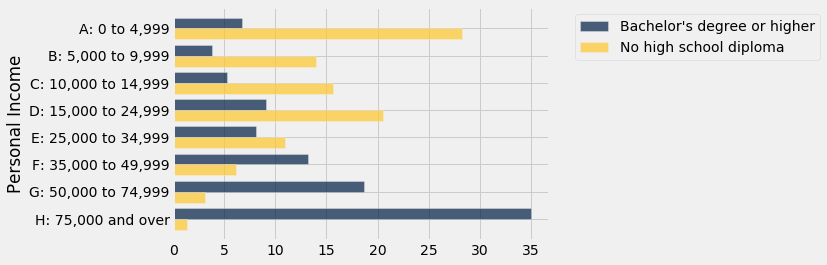

In [16]:
distributions.select(0, 1, 4).barh(0)

In [17]:
cones = Table().with_columns(
    'Flavor', make_array('strawberry', 'vanilla', 'chocolate', 'strawberry', 'chocolate'),
    'Price', make_array(3.55, 4.75, 6.55, 5.25, 5.75)
)
cones

Flavor,Price
strawberry,3.55
vanilla,4.75
chocolate,6.55
strawberry,5.25
chocolate,5.75


In [18]:
ratings = Table().with_columns(
    'Kind', make_array('strawberry', 'chocolate', 'vanilla'),
    'Stars', make_array(2.5, 3.5, 4)
)
ratings

Kind,Stars
strawberry,2.5
chocolate,3.5
vanilla,4


In [19]:
rated = cones.join('Flavor', ratings, 'Kind')
rated
# table1.join(table1_column_for_joining, table2, table2_column_for_joining)

Flavor,Price,Stars
chocolate,6.55,3.5
chocolate,5.75,3.5
strawberry,3.55,2.5
strawberry,5.25,2.5
vanilla,4.75,4


In [20]:
rated.with_column('$/Star', rated.column('Price') / rated.column('Stars')).sort(3)
# The new table rated allows us to work out the price per star, which you can think of as an informal measure of value.
# Low values are good – they mean that you are paying less for each rating star.# 

Flavor,Price,Stars,$/Star
vanilla,4.75,4,1.1875
strawberry,3.55,2.5,1.42
chocolate,5.75,3.5,1.64286
chocolate,6.55,3.5,1.87143
strawberry,5.25,2.5,2.1


In [21]:
# Caution. Order matters. Since the second table in a join is used to augment the first table
# it is important that each row in the first table has exactly one matching row in the second. 
ratings.join('Kind', cones, 'Flavor') # rated = cones.join('Flavor', ratings, 'Kind')

Kind,Stars,Price
chocolate,3.5,6.55
chocolate,3.5,5.75
strawberry,2.5,3.55
strawberry,2.5,5.25
vanilla,4,4.75


In [22]:
reviews = Table().with_columns(
    'Flavor', make_array('vanilla', 'chocolate', 'vanilla', 'chocolate'),
    'Stars', make_array(5, 3, 5, 4)
)
reviews

Flavor,Stars
vanilla,5
chocolate,3
vanilla,5
chocolate,4


In [23]:
average_review = reviews.group('Flavor', np.average)
average_review

Flavor,Stars average
chocolate,3.5
vanilla,5


In [24]:
cones.join('Flavor', average_review, 'Flavor')
# Notice how the strawberry cones have disappeared. None of the reviews are for strawberry cones, so there is nothing to which the strawberry rows can be joined.

Flavor,Price,Stars average
chocolate,6.55,3.5
chocolate,5.75,3.5
vanilla,4.75,5


In [10]:
trips = Table.read_table('trip.csv')
trips

Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107
913454,409,8/31/2015 23:10,San Jose City Hall,10,8/31/2015 23:17,San Salvador at 1st,8,68,Subscriber,95113
913453,789,8/31/2015 23:09,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,487,Customer,9069
913452,293,8/31/2015 23:07,Yerba Buena Center of the Arts (3rd @ Howard),68,8/31/2015 23:12,San Francisco Caltrain (Townsend at 4th),70,538,Subscriber,94118
913451,896,8/31/2015 23:07,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,363,Customer,92562
913450,255,8/31/2015 22:16,Embarcadero at Sansome,60,8/31/2015 22:20,Steuart at Market,74,470,Subscriber,94111
913449,126,8/31/2015 22:12,Beale at Market,56,8/31/2015 22:15,Temporary Transbay Terminal (Howard at Beale),55,439,Subscriber,94130
913448,932,8/31/2015 21:57,Post at Kearny,47,8/31/2015 22:12,South Van Ness at Market,66,472,Subscriber,94702


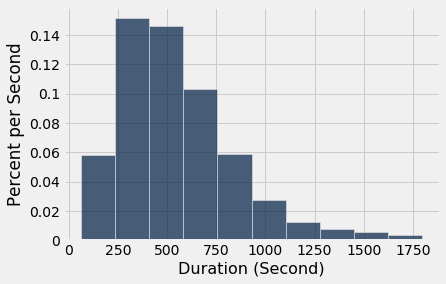

In [11]:
#We'll focus only on the free trips, which are trips that last less than 1800 seconds (half an hour). 
commute = trips.where('Duration', are.below(1800))
commute.hist('Duration', unit='Second')

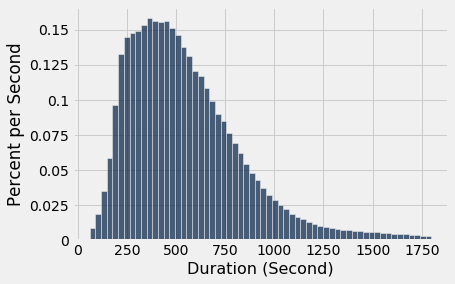

In [9]:
commute.hist('Duration', bins=60, unit='Second')

In [10]:
# Exploring the Data with group and pivot
# We can use group to identify the most highly used Start Station
starts = commute.group('Start Station').sort('count', descending=True)
starts

Start Station,count
San Francisco Caltrain (Townsend at 4th),25858
San Francisco Caltrain 2 (330 Townsend),21523
Harry Bridges Plaza (Ferry Building),15543
Temporary Transbay Terminal (Howard at Beale),14298
2nd at Townsend,13674
Townsend at 7th,13579
Steuart at Market,13215
Embarcadero at Sansome,12842
Market at 10th,11523
Market at Sansome,11023


In [13]:
commute.group(['Start Station', 'End Station'])

Start Station,End Station,count
2nd at Folsom,2nd at Folsom,54
2nd at Folsom,2nd at South Park,295
2nd at Folsom,2nd at Townsend,437
2nd at Folsom,5th at Howard,113
2nd at Folsom,Beale at Market,127
2nd at Folsom,Broadway St at Battery St,67
2nd at Folsom,Civic Center BART (7th at Market),47
2nd at Folsom,Clay at Battery,240
2nd at Folsom,Commercial at Montgomery,128
2nd at Folsom,Davis at Jackson,28


In [14]:
commute.pivot('Start Station', 'End Station')
# the first argument of a pivot statement specifies the column labels of the pivot table; the second argument labels the rows.

End Station,2nd at Folsom,2nd at South Park,2nd at Townsend,5th at Howard,Adobe on Almaden,Arena Green / SAP Center,Beale at Market,Broadway St at Battery St,California Ave Caltrain Station,Castro Street and El Camino Real,Civic Center BART (7th at Market),Clay at Battery,Commercial at Montgomery,Cowper at University,Davis at Jackson,Embarcadero at Bryant,Embarcadero at Folsom,Embarcadero at Sansome,Embarcadero at Vallejo,Evelyn Park and Ride,Franklin at Maple,Golden Gate at Polk,Grant Avenue at Columbus Avenue,Harry Bridges Plaza (Ferry Building),Howard at 2nd,Japantown,MLK Library,Market at 10th,Market at 4th,Market at Sansome,Mechanics Plaza (Market at Battery),Mezes Park,Mountain View Caltrain Station,Mountain View City Hall,Palo Alto Caltrain Station,Park at Olive,Paseo de San Antonio,Post at Kearny,Powell Street BART,Powell at Post (Union Square),Redwood City Caltrain Station,Redwood City Medical Center,Redwood City Public Library,Rengstorff Avenue / California Street,Ryland Park,SJSU - San Salvador at 9th,SJSU 4th at San Carlos,San Antonio Caltrain Station,San Antonio Shopping Center,San Francisco Caltrain (Townsend at 4th),San Francisco Caltrain 2 (330 Townsend),San Francisco City Hall,San Jose City Hall,San Jose Civic Center,San Jose Diridon Caltrain Station,San Mateo County Center,San Pedro Square,San Salvador at 1st,Santa Clara County Civic Center,Santa Clara at Almaden,South Van Ness at Market,Spear at Folsom,St James Park,Stanford in Redwood City,Steuart at Market,Temporary Transbay Terminal (Howard at Beale),Townsend at 7th,University and Emerson,Washington at Kearny,Yerba Buena Center of the Arts (3rd @ Howard)
2nd at Folsom,54,190,554,107,0,0,40,21,0,0,44,78,54,0,9,77,32,41,14,0,0,11,30,416,53,0,0,169,114,302,33,0,0,0,0,0,0,60,121,88,0,0,0,0,0,0,0,0,0,694,445,21,0,0,0,0,0,0,0,0,38,57,0,0,39,237,342,0,17,31
2nd at South Park,295,164,71,180,0,0,208,85,0,0,112,87,160,0,37,56,178,83,116,0,0,57,73,574,500,0,0,139,199,1633,119,0,0,0,0,0,0,299,84,113,0,0,0,0,0,0,0,0,0,559,480,48,0,0,0,0,0,0,0,0,66,152,0,0,374,429,143,0,63,209
2nd at Townsend,437,151,185,92,0,0,608,350,0,0,80,329,168,0,386,361,658,506,254,0,0,27,315,2607,295,0,0,110,225,845,177,0,0,0,0,0,0,120,100,141,0,0,0,0,0,0,0,0,0,905,299,14,0,0,0,0,0,0,0,0,72,508,0,0,2349,784,417,0,57,166
5th at Howard,113,177,148,83,0,0,59,130,0,0,203,76,129,0,30,57,49,166,54,0,0,85,78,371,478,0,0,303,158,168,90,0,0,0,0,0,0,93,183,169,0,0,0,0,0,0,0,0,0,690,1859,48,0,0,0,0,0,0,0,0,116,102,0,0,182,750,200,0,43,267
Adobe on Almaden,0,0,0,0,11,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,7,0,0,0,0,0,0,0,0,0,25,0,0,0,0,0,0,0,7,7,16,0,0,0,0,0,19,23,265,0,20,4,5,10,0,0,14,0,0,0,0,0,0,0
Arena Green / SAP Center,0,0,0,0,7,64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,5,0,0,0,0,0,0,0,0,0,21,0,0,0,0,0,0,0,24,3,7,0,0,0,0,0,6,20,7,0,56,12,38,259,0,0,13,0,0,0,0,0,0,0
Beale at Market,127,79,183,59,0,0,59,661,0,0,201,75,101,0,247,178,38,590,165,0,0,54,435,57,72,0,0,286,236,163,26,0,0,0,0,0,0,49,227,179,0,0,0,0,0,0,0,0,0,640,269,25,0,0,0,0,0,0,0,0,243,128,0,0,16,167,35,0,64,45
Broadway St at Battery St,67,89,279,119,0,0,1022,110,0,0,62,283,226,0,191,198,79,231,35,0,0,5,70,168,49,0,0,32,97,341,214,0,0,0,0,0,0,169,71,218,0,0,0,0,0,0,0,0,0,685,438,7,0,0,0,0,0,0,0,0,18,106,0,0,344,748,50,0,79,47
California Ave Caltrain Station,0,0,0,0,0,0,0,0,38,1,0,0,0,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,192,40,0,0,0,0,0,0,0,6,0,0,0,17,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57,0,0
Castro Street and El Camino Real,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,14,0,0,0,0,0,0,0,0,0,0,0,0,931,34,0,0,0,0,0,0,0,0,0,7,0,0,0,4,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
# use pivot to find the shortest time of the rides between Start and End Stations. 
# pivot has been given Duration as the optional values argument,and min as the function which to perform on the values in each cell.
commute.pivot('Start Station', 'End Station', 'Duration', min)

End Station,2nd at Folsom,2nd at South Park,2nd at Townsend,5th at Howard,Adobe on Almaden,Arena Green / SAP Center,Beale at Market,Broadway St at Battery St,California Ave Caltrain Station,Castro Street and El Camino Real,Civic Center BART (7th at Market),Clay at Battery,Commercial at Montgomery,Cowper at University,Davis at Jackson,Embarcadero at Bryant,Embarcadero at Folsom,Embarcadero at Sansome,Embarcadero at Vallejo,Evelyn Park and Ride,Franklin at Maple,Golden Gate at Polk,Grant Avenue at Columbus Avenue,Harry Bridges Plaza (Ferry Building),Howard at 2nd,Japantown,MLK Library,Market at 10th,Market at 4th,Market at Sansome,Mechanics Plaza (Market at Battery),Mezes Park,Mountain View Caltrain Station,Mountain View City Hall,Palo Alto Caltrain Station,Park at Olive,Paseo de San Antonio,Post at Kearny,Powell Street BART,Powell at Post (Union Square),Redwood City Caltrain Station,Redwood City Medical Center,Redwood City Public Library,Rengstorff Avenue / California Street,Ryland Park,SJSU - San Salvador at 9th,SJSU 4th at San Carlos,San Antonio Caltrain Station,San Antonio Shopping Center,San Francisco Caltrain (Townsend at 4th),San Francisco Caltrain 2 (330 Townsend),San Francisco City Hall,San Jose City Hall,San Jose Civic Center,San Jose Diridon Caltrain Station,San Mateo County Center,San Pedro Square,San Salvador at 1st,Santa Clara County Civic Center,Santa Clara at Almaden,South Van Ness at Market,Spear at Folsom,St James Park,Stanford in Redwood City,Steuart at Market,Temporary Transbay Terminal (Howard at Beale),Townsend at 7th,University and Emerson,Washington at Kearny,Yerba Buena Center of the Arts (3rd @ Howard)
2nd at Folsom,61,97,164,268,0,0,271,407,0,0,483,329,306,0,494,239,262,687,599,0,0,639,416,282,80,0,0,506,237,167,250,0,0,0,0,0,0,208,264,290,0,0,0,0,0,0,0,0,0,300,303,584,0,0,0,0,0,0,0,0,590,208,0,0,318,149,448,0,429,165
2nd at South Park,61,60,77,86,0,0,78,345,0,0,290,188,171,0,357,104,81,490,341,0,0,369,278,122,60,0,0,416,142,61,68,0,0,0,0,0,0,60,237,106,0,0,0,0,0,0,0,0,0,63,66,458,0,0,0,0,0,0,0,0,399,63,0,0,79,61,78,0,270,96
2nd at Townsend,137,67,60,423,0,0,311,469,0,0,546,520,474,0,436,145,232,509,494,0,0,773,549,325,221,0,0,667,367,265,395,0,0,0,0,0,0,319,455,398,0,0,0,0,0,0,0,0,0,125,133,742,0,0,0,0,0,0,0,0,777,241,0,0,291,249,259,0,610,284
5th at Howard,215,300,384,68,0,0,357,530,0,0,179,412,364,0,543,419,359,695,609,0,0,235,474,453,145,0,0,269,161,250,306,0,0,0,0,0,0,234,89,202,0,0,0,0,0,0,0,0,0,256,221,347,0,0,0,0,0,0,0,0,375,402,0,0,455,265,357,0,553,109
Adobe on Almaden,0,0,0,0,84,275,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,701,387,0,0,0,0,0,0,0,0,0,229,0,0,0,0,0,0,0,441,452,318,0,0,0,0,0,309,146,182,0,207,358,876,101,0,0,369,0,0,0,0,0,0,0
Arena Green / SAP Center,0,0,0,0,305,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,526,546,0,0,0,0,0,0,0,0,0,403,0,0,0,0,0,0,0,288,875,685,0,0,0,0,0,440,420,153,0,166,624,759,116,0,0,301,0,0,0,0,0,0,0
Beale at Market,219,343,417,387,0,0,60,155,0,0,343,122,153,0,115,216,170,303,198,0,0,437,235,149,204,0,0,535,203,88,72,0,0,0,0,0,0,191,316,191,0,0,0,0,0,0,0,0,0,499,395,526,0,0,0,0,0,0,0,0,575,173,0,0,87,94,619,0,222,264
Broadway St at Battery St,351,424,499,555,0,0,195,62,0,0,520,90,129,0,70,340,284,128,101,0,0,961,148,168,357,0,0,652,351,218,221,0,0,0,0,0,0,255,376,316,0,0,0,0,0,0,0,0,0,611,599,799,0,0,0,0,0,0,0,0,738,336,0,0,169,291,885,0,134,411
California Ave Caltrain Station,0,0,0,0,0,0,0,0,82,1645,0,0,0,628,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1771,0,484,131,0,0,0,0,0,0,0,1077,0,0,0,870,911,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,531,0,0
Castro Street and El Camino Real,0,0,0,0,0,0,0,0,0,74,0,0,0,0,0,0,0,0,0,499,0,0,0,0,0,0,0,0,0,0,0,0,201,108,0,0,0,0,0,0,0,0,0,654,0,0,0,953,696,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
stations = Table.read_table('station.csv')
stations

station_id,name,lat,long,dockcount,landmark,installation
2,San Jose Diridon Caltrain Station,37.3297,-121.902,27,San Jose,8/6/2013
3,San Jose Civic Center,37.3307,-121.889,15,San Jose,8/5/2013
4,Santa Clara at Almaden,37.334,-121.895,11,San Jose,8/6/2013
5,Adobe on Almaden,37.3314,-121.893,19,San Jose,8/5/2013
6,San Pedro Square,37.3367,-121.894,15,San Jose,8/7/2013
7,Paseo de San Antonio,37.3338,-121.887,15,San Jose,8/7/2013
8,San Salvador at 1st,37.3302,-121.886,15,San Jose,8/5/2013
9,Japantown,37.3487,-121.895,15,San Jose,8/5/2013
10,San Jose City Hall,37.3374,-121.887,15,San Jose,8/6/2013
11,MLK Library,37.3359,-121.886,19,San Jose,8/6/2013


In [13]:
# map of where the stations are located, using Marker.map_table
# The function operates on a table, whose columns are (in order) latitude, longitude, and an optional identifier for each point.
Marker.map_table(stations.select('lat', 'long', 'name'))
# The map is created using OpenStreetMap, which is an open online mapping system that you can use just as you would use Google Maps or any other online map.

In [13]:
# You can also represent points on a map by colored circles. 
sf = stations.where('landmark', are.equal_to('San Francisco'))
sf_map_data = sf.select('lat', 'long', 'name')
Circle.map_table(sf_map_data, color='green', radius=200)

In [11]:
cities = stations.group('landmark').relabeled('landmark', 'city')
cities

city,count
Mountain View,7
Palo Alto,5
Redwood City,7
San Francisco,35
San Jose,16


In [12]:
colors = cities.with_column('color', make_array('blue', 'red', 'green', 'orange', 'purple'))
colors

city,count,color
Mountain View,7,blue
Palo Alto,5,red
Redwood City,7,green
San Francisco,35,orange
San Jose,16,purple


In [15]:
# join stations and colors by landmark, and then select the columns we need to draw a map.
joined = stations.join('landmark', colors, 'city')
joined
# colored = joined.select('lat', 'long', 'name', 'color')
# Marker.map_table(colored)

landmark,station_id,name,lat,long,dockcount,installation,count,color
Mountain View,27,Mountain View City Hall,37.3892,-122.082,15,8/16/2013,7,blue
Mountain View,28,Mountain View Caltrain Station,37.3944,-122.077,23,8/15/2013,7,blue
Mountain View,29,San Antonio Caltrain Station,37.4069,-122.107,23,8/15/2013,7,blue
Mountain View,30,Evelyn Park and Ride,37.3903,-122.067,15,8/16/2013,7,blue
Mountain View,31,San Antonio Shopping Center,37.4004,-122.108,15,12/31/2013,7,blue
Mountain View,32,Castro Street and El Camino Real,37.386,-122.084,11,12/31/2013,7,blue
Mountain View,33,Rengstorff Avenue / California Street,37.4002,-122.099,15,8/16/2013,7,blue
Palo Alto,34,Palo Alto Caltrain Station,37.444,-122.165,23,8/14/2013,5,red
Palo Alto,35,University and Emerson,37.4445,-122.163,11,8/15/2013,5,red
Palo Alto,36,California Ave Caltrain Station,37.4291,-122.143,15,8/14/2013,5,red


In [16]:
colored = joined.select('lat', 'long', 'name', 'color')
Marker.map_table(colored)

In [14]:
# To see where most of the bike rentals originate, let's identify the start stations:
starts = commute.group('Start Station').sort('count', descending=True)
starts

Start Station,count
San Francisco Caltrain (Townsend at 4th),25858
San Francisco Caltrain 2 (330 Townsend),21523
Harry Bridges Plaza (Ferry Building),15543
Temporary Transbay Terminal (Howard at Beale),14298
2nd at Townsend,13674
Townsend at 7th,13579
Steuart at Market,13215
Embarcadero at Sansome,12842
Market at 10th,11523
Market at Sansome,11023


In [15]:
# We can include the geographical data needed to map these stations, by first joining starts with stations:
station_starts = stations.join('name', starts, 'Start Station')
station_starts

name,station_id,lat,long,dockcount,landmark,installation,count
2nd at Folsom,62,37.7853,-122.396,19,San Francisco,8/22/2013,7841
2nd at South Park,64,37.7823,-122.393,15,San Francisco,8/22/2013,9274
2nd at Townsend,61,37.7805,-122.39,27,San Francisco,8/22/2013,13674
5th at Howard,57,37.7818,-122.405,15,San Francisco,8/21/2013,7394
Adobe on Almaden,5,37.3314,-121.893,19,San Jose,8/5/2013,522
Arena Green / SAP Center,14,37.3327,-121.9,19,San Jose,8/5/2013,590
Beale at Market,56,37.7923,-122.397,19,San Francisco,8/20/2013,8135
Broadway St at Battery St,82,37.7985,-122.401,15,San Francisco,1/22/2014,7460
California Ave Caltrain Station,36,37.4291,-122.143,15,Palo Alto,8/14/2013,300
Castro Street and El Camino Real,32,37.386,-122.084,11,Mountain View,12/31/2013,1137


In [16]:
# Now we extract just the data needed for drawing our map, adding a color and an area to each station.
# The area is 1000 times the count of the number of rentals starting at each station, 
# where the constant 1000 was chosen so that the circles would appear at an appropriate scale on the map.
starts_map_data = station_starts.select('lat', 'long', 'name').with_columns(
    'color', 'blue',
    'area', station_starts.column('count') * 1000
)
starts_map_data.show(3)
Circle.map_table(starts_map_data)

lat,long,name,color,area
37.7853,-122.396,2nd at Folsom,blue,7841000
37.7823,-122.393,2nd at South Park,blue,9274000
37.7805,-122.39,2nd at Townsend,blue,13674000
